**SREE RAM ROSHAN A S - 24BAD113**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/calcofi/bottle.csv
/kaggle/input/calcofi/cast.csv


In [2]:
df = pd.read_csv("/kaggle/input/calcofi/bottle.csv")
df.columns

/tmp/ipykernel_56/1054713371.py:1: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/kaggle/input/calcofi/bottle.csv")


Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum',
       'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual',
       'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM',
       'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM',
       'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q',
       'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim',
       'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA',
       'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3',
       'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_PRES', 'R_SAMP', 'DIC1',
       'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment'],
      dtype='object')

In [3]:
df1 = pd.read_csv("/kaggle/input/calcofi/cast.csv")
df1.columns

/tmp/ipykernel_56/2096011000.py:1: DtypeWarning: Columns (40,41,44,45,46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv("/kaggle/input/calcofi/cast.csv")


Index(['Cst_Cnt', 'Cruise_ID', 'Cruise', 'Cruz_Sta', 'DbSta_ID', 'Cast_ID',
       'Sta_ID', 'Quarter', 'Sta_Code', 'Distance', 'Date', 'Year', 'Month',
       'Julian_Date', 'Julian_Day', 'Time', 'Lat_Dec', 'Lat_Deg', 'Lat_Min',
       'Lat_Hem', 'Lon_Dec', 'Lon_Deg', 'Lon_Min', 'Lon_Hem', 'Rpt_Line',
       'St_Line', 'Ac_Line', 'Rpt_Sta', 'St_Station', 'Ac_Sta', 'Bottom_D',
       'Secchi', 'ForelU', 'Ship_Name', 'Ship_Code', 'Data_Type', 'Order_Occ',
       'Event_Num', 'Cruz_Leg', 'Orig_Sta_ID', 'Data_Or', 'Cruz_Num', 'IntChl',
       'IntC14', 'Inc_Str', 'Inc_End', 'PST_LAN', 'Civil_T', 'TimeZone',
       'Wave_Dir', 'Wave_Ht', 'Wave_Prd', 'Wind_Dir', 'Wind_Spd', 'Barometer',
       'Dry_T', 'Wet_T', 'Wea', 'Cloud_Typ', 'Cloud_Amt', 'Visibility'],
      dtype='object')

In [4]:
data = pd.merge(df, df1, on='Cst_Cnt', how='left')
data.head()

,Cst_Cnt,Btl_Cnt,Sta_ID_x,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,Wave_Prd,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Typ,Cloud_Amt,Visibility
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,23.0,18.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,23.0,18.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,23.0,18.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,23.0,18.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,23.0,18.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN


In [5]:
target_col = 'T_degC'  # REPLACE with your actual water temperature column name

# Separate Features (X) and Target (y)
# Dropping non-numeric columns for this regression example
X = data.drop(columns=[target_col]).select_dtypes(include=[np.number])
y = data[target_col]

In [6]:
# --- STEP 1: Handle Missing Values ---
# Imputing 'mean' for features and 'mean' for target (if target has missing values)
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Handle missing values in target if necessary
y = y.fillna(y.mean())

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

In [8]:
# --- STEP 3: Feature Scaling ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [10]:
y_pred = lr_model.predict(X_test_scaled)

In [11]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("--- Baseline Linear Regression Performance ---")
print(f"MSE:  {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²:   {r2:.4f}")

--- Baseline Linear Regression Performance ---
MSE:  0.0000
RMSE: 0.0006
R²:   1.0000


Text(0.5, 1.0, 'Actual vs Predicted')

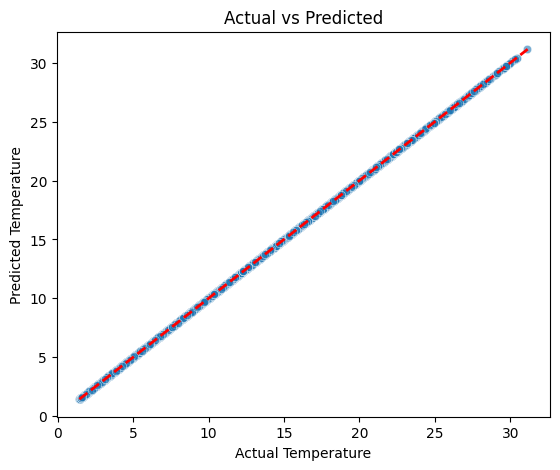

In [12]:
plt.figure(figsize=(14, 5))

# Plot 1: Actual vs Predicted
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2) # Identity line
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Actual vs Predicted')

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6, color='steelblue', edgecolor='k')
plt.axhline(0, color='red', linestyle='--', lw=2, label='Zero Error')

# Add a Trend Line (Lowess) to check for bias
sns.regplot(x=y_pred, y=residuals, scatter=False, color='darkorange', lowess=True, line_kws={'label': 'Trend (Lowess)'})

plt.xlabel('Predicted Temperature (°C)', fontsize=12)
plt.ylabel('Residuals (Actual - Predicted)', fontsize=12)
plt.title('Residuals vs Predicted Values (Homoscedasticity Check)', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
print("--- Model Optimization ---")

# A. Feature Selection (Select Top k Features)
selector = SelectKBest(score_func=f_regression, k=5) # Select top 5 features
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

print(f"Selected Features: {X.columns[selector.get_support()].tolist()}")

In [ ]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_selected, y_train)
y_pred_ridge = ridge_model.predict(X_test_selected)
print(f"Ridge RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_ridge)):.4f}")

In [ ]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_selected, y_train)
y_pred_lasso = lasso_model.predict(X_test_selected)
print(f"Lasso RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lasso)):.4f}")